In [114]:
import numpy as np
import choix
import opt_fair
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from matplotlib import colors

In [115]:
size = 100 #number of items
min_size = 30 
maj_size = size - min_size


In [116]:
np.random.seed(44)
maxv=   5
minv=  -5
#original = np.random.uniform(minv,maxv ,size = size)
original = np.random.normal(0,5 ,size = size)
original = original - np.mean(original)

classes = [0] * maj_size + [1] * min_size

In [117]:
max_iters=100

num_revs = 10

revs_bias = [1,-1]*5

In [118]:
%%time

pairs_per_reviewer = 1000

biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
revs_set =  opt_fair._create_pc_set_for_reviewers(biased_scores,pairs_per_reviewer)

pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
annot_bt,annot_bias =  opt_fair._alternate_optim(size, num_revs, pc_with_revs, iters = max_iters)
res,x = stats.kendalltau(annot_bt,original)
MSE = np.square(np.subtract(annot_bias, [x for x in revs_bias])).mean()




CPU times: user 1min 48s, sys: 58.7 s, total: 2min 47s
Wall time: 44.7 s


In [119]:
annot_bias

array([-0.56795668, -2.46776056, -0.38462203, -2.73019571, -0.13950561,
       -2.53764845, -0.4403045 , -2.52088798, -0.48557423, -2.25945017])

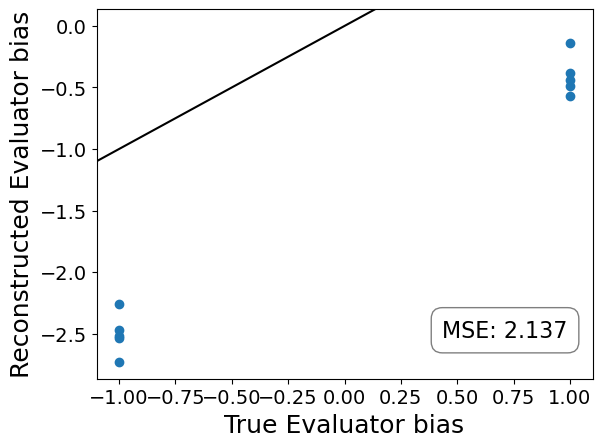

In [120]:
plt.scatter(revs_bias,annot_bias)
#plt.xlim([-6,6])
#plt.ylim([-6,6])
plt.axline([0, 0], slope=1, color = 'black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('True Evaluator bias', fontsize=18)
plt.ylabel('Reconstructed Evaluator bias', fontsize=18)


bbox_props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.5)
plt.text(0.95, 0.1, f"MSE: {MSE:.3f}", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=16, bbox=bbox_props)


plt.show()